purpose of this project is to understand who holds the two different opinions about ease of voting. Examine the relationships between the ease of voting variable and sex, political party membership, and employment status.

# importing the dataset

In [1]:
import pyreadstat

# Specify the path to the .sav file
file_path = "pew_apr_19-23_2017_weekly_ch5.sav"

# Read the .sav file
vote, meta = pyreadstat.read_sav(file_path)

In [2]:
vote.head()

,case_id,week,state,metro,region,division,date,pew1rot,pew1arot,pew1a,...,polview,regvote,c3a,sex,religion,ident,c1a,bornus,qnco3,popwght
0,10000053,816.0,SC,3.0,3.0,5.0,170419,EDBCA,1.0,2.0,...,3.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,1.5468
1,10000054,816.0,PA,2.0,1.0,2.0,170419,ABECD,1.0,1.0,...,1.0,1.0,1.0,2.0,90.0,1.0,3.0,NaN,NaN,0.4379
2,10000055,816.0,WV,1.0,3.0,5.0,170419,ECABD,2.0,9.0,...,2.0,1.0,1.0,1.0,99.0,1.0,NaN,NaN,NaN,1.1530
3,10000056,816.0,MI,3.0,2.0,3.0,170419,BCDAE,1.0,2.0,...,4.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,0.4024
4,10000057,816.0,GA,3.0,3.0,5.0,170419,CABDE,2.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,NaN,NaN,0.2671


## cleaning the data

In [8]:
import pandas as pd

# Select variables and rename them
vote_cleaned = vote[['pew1a', 'pew1b', 'race', 'sex', 'mstatus', 'ownhome', 'employ', 'polparty']]


# Clean and transform variables
vote_cleaned['pew1a'] = vote_cleaned['pew1a'].replace({1: 'Register to vote', 2: 'Make easy to vote', 5: None, 9: None})
vote_cleaned = vote_cleaned.rename(columns={'pew1a': 'ease.vote'})

vote_cleaned['pew1b'] = vote_cleaned['pew1b'].replace({1: 'Require to vote', 2: 'Choose to vote', 5: None, 9: None})
vote_cleaned = vote_cleaned.rename(columns={'pew1b': 'require.vote'})

vote_cleaned['race'] = vote_cleaned['race'].replace({1: 'White non-Hispanic', 2: 'Black non-Hispanic',
                                                    3: 'Hispanic', 4: 'Hispanic', 5: 'Hispanic',
                                                    6: 'Other', 7: 'Other', 8: 'Other', 9: 'Other',
                                                    10: 'Other', 99: None})

vote_cleaned['sex'] = vote_cleaned['sex'].replace({1: 'Male', 2: 'Female'})

vote_cleaned['ownhome'] = vote_cleaned['ownhome'].replace({1: 'Owned', 2: 'Rented', 8: None, 9: None})

vote_cleaned['employ'] = vote_cleaned['employ'].replace({1: 'Employed full-time', 2: 'Employed part-time', 
                                                         3:'Not employed', 4:'Not employed',5:'Not employed',
                                                         6:'Not employed',7:'Not employed',8:'Not employed', 9: None})

vote_cleaned['mstatus'] = vote_cleaned['mstatus'].replace({1: 'Single, that is never married', 2: 'Single, living with a partner', 
                                                         3:'Married', 4:'Separated',5:'Widowed',
                                                         6:'Divorced', 9: None})

vote_cleaned['polparty'] = vote_cleaned['polparty'].replace({1: 'A Republican', 2: 'A Democrat', 
                                                         3:'An Independent', 0:None,8:None,
                                                          9: None})

# Convert the recoded columns to categorical data type
vote_cleaned['ease.vote'] = vote_cleaned['ease.vote'].astype('category')
vote_cleaned['require.vote'] = vote_cleaned['require.vote'].astype('category')
vote_cleaned['race'] = vote_cleaned['race'].astype('category')
vote_cleaned['sex'] = vote_cleaned['sex'].astype('category')
vote_cleaned['ownhome'] = vote_cleaned['ownhome'].astype('category')
vote_cleaned['employ'] = vote_cleaned['employ'].astype('category')
vote_cleaned['mstatus'] = vote_cleaned['mstatus'].astype('category')
vote_cleaned['polparty'] = vote_cleaned['polparty'].astype('category')

C:\Users\Arian\AppData\Local\Temp\ipykernel_20640\2560828082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_cleaned['pew1a'] = vote_cleaned['pew1a'].replace({1: 'Register to vote', 2: 'Make easy to vote', 5: None, 9: None})


In [9]:
vote_cleaned.head()

,ease.vote,require.vote,race,sex,mstatus,ownhome,employ,polparty
0,Make easy to vote,Choose to vote,Black non-Hispanic,Female,Married,Owned,Employed full-time,A Democrat
1,Register to vote,Choose to vote,White non-Hispanic,Female,Divorced,Owned,Employed full-time,A Republican
2,NaN,NaN,White non-Hispanic,Male,NaN,Owned,Not employed,A Republican
3,Make easy to vote,Require to vote,White non-Hispanic,Female,Divorced,Owned,Not employed,A Democrat
4,Register to vote,Require to vote,White non-Hispanic,Female,Widowed,Owned,Not employed,A Republican


In [10]:
vote_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ease.vote     1001 non-null   category
 1   require.vote  1011 non-null   category
 2   race          1003 non-null   category
 3   sex           1028 non-null   category
 4   mstatus       1016 non-null   category
 5   ownhome       1006 non-null   category
 6   employ        1025 non-null   category
 7   polparty      961 non-null    category
dtypes: category(8)
memory usage: 9.3 KB


# EDA

In [11]:
# Create a cross-tabulation table
table = pd.crosstab(vote_cleaned['sex'], vote_cleaned['ease.vote'])

# Compute the row-wise percentages
percentages = table.apply(lambda row: row / row.sum(), axis=1)

percentages

ease.vote,Make easy to vote,Register to vote
sex,,
Female,0.600382,0.399618
Male,0.583682,0.416318


The table shows the proportion of individuals in each combination of gender and percents voting ease. For example, 20.8% of females in the sample chose Register to vote and 31.3% chose Make easy to vote, while 19.8% of males in the sample chose Register to vote and 27.8% chose Make easy to vote.

In [13]:
# Create a cross-tabulation table
table = pd.crosstab(vote_cleaned['mstatus'], vote_cleaned['ease.vote'])

# Compute the column-wise percentages
percentages = table.apply(lambda col: col / col.sum(), axis=0)

percentages

ease.vote,Make easy to vote,Register to vote
mstatus,,
Divorced,0.145051,0.113861
Married,0.389078,0.462871
Separated,0.023891,0.014851
"Single, living with a partner",0.080205,0.074257
"Single, that is never married",0.252560,0.183168
Widowed,0.109215,0.150990


The table shows the proportion of individuals in each combination of marital status and percents voting ease. 


In [14]:
# Create a cross-tabulation table
table = pd.crosstab(vote_cleaned['employ'], vote_cleaned['ease.vote'])

# Compute the column-wise percentages
percentages = table.apply(lambda col: col / col.sum(), axis=0)

percentages


ease.vote,Make easy to vote,Register to vote
employ,,
Employed full-time,0.416244,0.395577
Employed part-time,0.130288,0.122850
Not employed,0.453469,0.481572


The table shows the proportion of individuals in each combination of employment status and percents voting ease. 
 

In [16]:
# Create a cross-tabulation table
table = pd.crosstab(vote_cleaned['polparty'], vote_cleaned['ease.vote'])

# Compute the column-wise percentages
percentages = table.apply(lambda col: col / col.sum(), axis=0)

percentages

ease.vote,Make easy to vote,Register to vote
polparty,,
A Democrat,0.450805,0.147368
A Republican,0.153846,0.413158
An Independent,0.395349,0.439474


The table shows the proportion of individuals in each combination of political party and percents voting ease.

### Use the NHST process and test whether or not there is a relationship between opinion on ease of voting and sex, marital status, employment status, and political party 

Relationship between opinion on ease of voting and sex:

####################################################

NHST Step 1: Explicitly mention H0 and HA 

####################################################

H0: there is no relationship between opinion on ease of voting and sex
HA: there is a relationship between opinion on ease of voting and sex


#######################################

NHST Step 2: Get the test statistic & p-value

#######################################

In [20]:
from scipy.stats import chi2_contingency
import numpy as np

# Create a contingency table
contingency_table = pd.crosstab(vote_cleaned['ease.vote'], vote_cleaned['sex'])

# Perform the chi-squared test
chi2, p_value, degrees_of_freedom, _ = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("degrees_of_freedom:", degrees_of_freedom)

Chi-squared statistic: 0.2234529738929315
P-value: 0.636421427225919
degrees_of_freedom: 1


Text(0, 0.5, 'Probability Density')

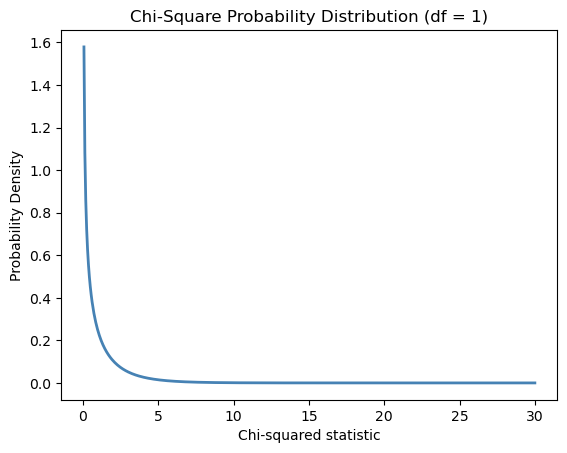

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 1  # Degrees of freedom

x = np.linspace(0, 30, 500)
y = chi2.pdf(x, df)

plt.plot(x, y, color='steelblue', linewidth=2)
plt.title('Chi-Square Probability Distribution (df = 1)')
plt.xlabel('Chi-squared statistic')
plt.ylabel('Probability Density')


#######################################

NHST Step 3: Calculate the probability that your test statistic is at least as big as it is if there is no relationship (i.e., the null is true)

#######################################

The probability of seeing a chi-squared of 0.22 in our sample if there were no relationship in the population between opinion on voting ease and sex would be 63.6% or p > 05.
So, test statistic of 0.22345 and df=1, this means that there is little evidence to reject the null hypothesis that there is no association between the two variables.


#####################################################################

NHST Step 4: If the probability that the null is true is very small, usually less than 5%, reject the null hypothesis.

####################################################################
Not applicable here as p > 0.05 


#####################################################################

NHST Step 5: If the probability that the null is true is not small, usually 5% or greater, retain the null hypothesis

#####################################################################

p > 0.05.
Hence, retain null hypothesis


#####################################################################

Report the full interpretation:

#####################################################################

We used the chi-squared test to test the null hypothesis that there was no relationship between opinion on ease of voting and sex group. We **accept** the null hypothesis and concluded that there was not a statistically significant association between views on voter registration and sex [χ2(1) = 0.22345; p > .05].

---
### Relationship between opinion on ease of voting and marital status:

####################################################

NHST Step 1: Explicitly mention H0 and HA 

####################################################

H0: there is no relationship between opinion on ease of voting and marital status
HA: there is a relationship between opinion on ease of voting and marital status


#######################################

NHST Step 2: Get the test statistic & p-value

#######################################

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(vote_cleaned['ease.vote'], vote_cleaned['mstatus'])

# Perform the chi-squared test
chi2, p_value, degrees_of_freedom, _ = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("degrees_of_freedom:", degrees_of_freedom)

Chi-squared statistic: 14.380632788675662
P-value: 0.01336407132975084
degrees_of_freedom: 5


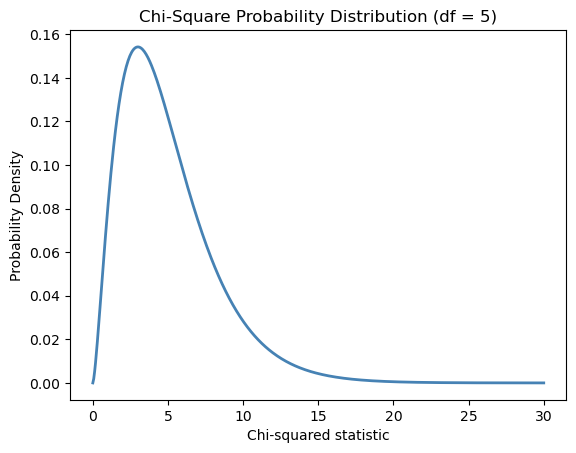

In [28]:
df = 5  # Degrees of freedom

x = np.linspace(0, 30, 500)
y = chi2.pdf(x, df)

plt.plot(x, y, color='steelblue', linewidth=2)
plt.title('Chi-Square Probability Distribution (df = 5)')
plt.xlabel('Chi-squared statistic')
plt.ylabel('Probability Density')
plt.show()


#######################################

NHST Step 3: Calculate the probability that your test statistic is at least as big as it is if there is no relationship (i.e., the null is true)

#######################################

The probability of seeing a chi-squared as big as 14.381 in our sample if there were no relationship in the population between opinion on voting ease and marital status would be 0.01336 or p < .05.
This means that there is evidence to reject the null hypothesis that there is no association between the two variables. The test statistic is relatively large, indicating a strong association between the variables.


#####################################################################

NHST Step 4: If the probability that the null is true is very small, usually less than 5%, reject the null hypothesis.

####################################################################
p = 0.01336 or p < .05
Hence, Rejecting null hypothesis


#####################################################################

NHST Step 5: If the probability that the null is true is not small, usually 5% or greater, retain the null hypothesis

#####################################################################

Not applicable here as p < 0.05


#####################################################################

Report the full interpretation:

#####################################################################
We used the chi-squared test to test the null hypothesis that there was no relationship between opinion on ease of voting and marital status. We **reject** the null hypothesis and concluded that there was a statistically significant association between views on voter registration and marital status [χ2(5) = 14.381; p < .05].